In [1]:
import importlib
 
if importlib.util.find_spec('fsspec') is None:
  !pip install fsspec
if importlib.util.find_spec('s3fs') is None:
  !pip install s3fs

     |████████████████████████████████| 102kB 3.2MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 6.5MB 8.1MB/s 
     |████████████████████████████████| 1.3MB 40.5MB/s 
     |████████████████████████████████| 552kB 51.1MB/s 
     |████████████████████████████████| 296kB 36.2MB/s 
     |████████████████████████████████| 143kB 43.0MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=a6f622b714e954d2575214954d8262239baeb1bffc40fd271e6e49dea72f7559
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

<h2>Data</h2>

In [3]:
# read data into dataframe
df = pd.read_csv('https://lfspf.s3.eu-central-1.amazonaws.com/Bitcoindata.csv',parse_dates=True,index_col='Date')


In [4]:
#Change the name of the column
df.columns=['Close Price']
# sort the data ascending in datetime
df.sort_index(ascending=True,inplace=True)

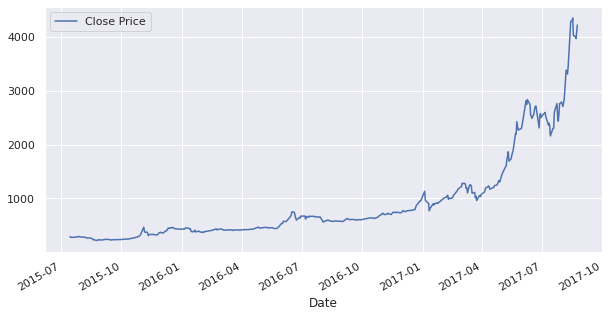

In [5]:
df.plot(figsize=(10,5));

Calculate the log returns

In [6]:
df['Ret']= df['Close Price'].pct_change(periods=1)
df.head()

,Close Price,Ret
Date,,
2015-07-15,291.2523,NaN
2015-07-16,276.1400,-0.051887
2015-07-17,278.2650,0.007695
2015-07-21,278.9625,0.002507
2015-07-22,277.0599,-0.006820


Calculate the Volatility

In [7]:
print('Volatility of Bitcoin =',np.round(df['Ret'].std()*np.sqrt(250)*100,2), '%')

Volatility of Bitcoin = 76.9 %


<h2>Gaussian Mixture</h2> <br>
Studying the bitcoin returns as the combination of <b>three</b> gaussians. Each gaussian represents a regime

In [8]:
from sklearn import mixture

In [9]:
df['Ret'].replace([np.inf, -np.inf], np.nan,inplace=True)
df.dropna(inplace=True)
data = df['Ret'].values
clf = mixture.GaussianMixture(n_components=3)
clf.fit(data.reshape(-1,1))


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [10]:
for i in np.arange(0,3):
    print('Regime',i)
    print('Prob',clf.weights_[i]*100,'%')
    print('Avg:',clf.means_[i]*100,'%')
    print('\n')

Regime 0
Prob 12.98791424071934 %
Avg: [6.37520069] %


Regime 1
Prob 79.25405798095206 %
Avg: [0.60656794] %


Regime 2
Prob 7.758027778328643 %
Avg: [-7.25912445] %




In [11]:
for i in np.arange(0,len(clf.weights_)):
    print('Regime',i,np.round(100*clf.weights_[i],2),'%',
          '[Mean=',np.round(100*clf.means_[i,0],2),
          '%, StDev=',np.round(100*np.sqrt(clf.covariances_[i][0,0]),2),']')

Regime 0 12.99 % [Mean= 6.38 %, StDev= 8.92 ]
Regime 1 79.25 % [Mean= 0.61 %, StDev= 1.95 ]
Regime 2 7.76 % [Mean= -7.26 %, StDev= 3.86 ]


How does one know which regime we are in ?